In [95]:
import pickle as cp
import numpy as np

# load data for white wine
X, y = cp.load(open('winequality-white.pickle', 'rb'), encoding = 'latin1')

In [96]:
# separate train and test data (80% vs 20%)
# The y-values are integers between 3 and 9 indicating the quality of the wine
N, D = X.shape

N_train = int(0.8 * N)
N_test = N - N_train

X_train = X[:N_train]
y_train = y[:N_train]

X_test = X[N_test:]
y_test = y[N_test:]


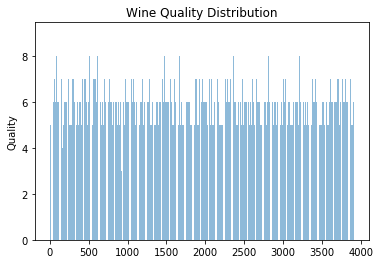

In [97]:
# Handin 1
# Make a bar chart showing the distribution of y-values in the training set
import matplotlib.pyplot as plt

y_pos = np.arange(len(X_train))
plt.bar(y_pos, y_train, align='center', alpha=0.5)
plt.ylabel('Quality')
plt.title('Wine Quality Distribution')

plt.show()

In [98]:
# Handin 2
# Report  the  mean  squared  error,  i.e.,  the  average  of  the  squared  residuals,
# using  this simplest  of  predictors  on  the  training  and  test  data.
y_prediction = np.average(y_train)
mse_train = np.average((y_prediction - y_train) ** 2)
mse_test = np.average((y_prediction - y_test) ** 2)
print("Mean Squared Error on Training Data: %f" %mse_train)
print("Mean Squared Error on Test Data: %f" %mse_test)

# from sklearn.metrics import mean_squared_error
# y_pred = np.full((1, len(y_test)), y_prediction)
# print("Mean Squared Error on Test Data: %f" %mean_squared_error(y_test, y_pred[0, :]))


Mean Squared Error on Training Data: 0.776777
Mean Squared Error on Test Data: 0.786778


In [130]:
# Handin 3
# Report the mean squared error using the linear model on the training and test data
from sklearn.metrics import mean_squared_error

def normalize(data_vector: np.ndarray,
              mean: float, std: float) -> np.ndarray:
    return (data_vector - mean) / std

def calculate_weights(train_data: np.ndarray,
                      train_out: np.ndarray) -> np.ndarray:
    train_data_transposed = train_data.T
    return (np.linalg.inv(train_data_transposed.dot(train_data))).dot(train_data_transposed).dot(train_out) 

def predict(data_vector: np.ndarray,
            w: np.ndarray) -> np.ndarray:
    return data_vector.dot(w)

x_train_mean = np.mean(X_train)
x_train_std = np.std(X_train)

X_train_norm = normalize(X_train, x_train_mean, x_train_std)

X_test_norm = normalize(X_test, x_train_mean, x_train_std)

w = calculate_weights(X_train_norm, y_train)

y_pred_train = predict(X_train_norm, w)
y_pred_test = predict(X_test_norm, w)

print("Mean Squared Error on Train Data: %f" %mean_squared_error(y_train, y_pred_train))
print("Mean Squared Error on Test Data: %f" %mean_squared_error(y_test, y_pred_test))


Mean Squared Error on Train Data: 0.571561
Mean Squared Error on Test Data: 0.567391


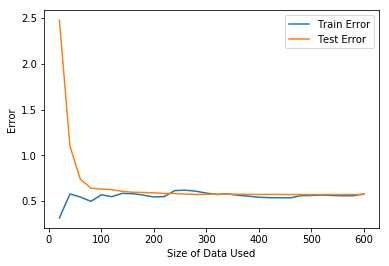

In [132]:
# Handin 4
# Report the learning curves plot
# Plot the training error and test error as a function of the size of the dataset used for training
dataset_sizes = []
train_errs = []
test_errs = []

i = 20
while i <= 600 :
    X_train_new = X_train[:i]
    y_train_new = y_train[:i]
    w = calculate_weights(X_train_new, y_train_new)
    y_pred_train = predict(X_train_new, w)
    y_pred_test = predict(X_test, w)
    train_errs.append(mean_squared_error(y_train_new, y_pred_train))
    test_errs.append(mean_squared_error(y_test, y_pred_test))
    dataset_sizes.append(i)
    i += 20

plt.plot(dataset_sizes, train_errs, label = "Train Error") 
plt.plot(dataset_sizes, test_errs, label = "Test Error")

plt.legend(loc=1)

plt.xlabel('Size of Data Used')
plt.ylabel('Error')

plt.show()

In [170]:
# Polynomial Basis Expansion with Ridge and Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_normalized = scaler.transform(X_train)

N_train, D = X_train.shape

N_train_new = int(0.8 * N_train)
N_validation = N_train - N_train_new

X_train_new = X_train_normalized[:N_train_new]
y_train_new = y_train[:N_train_new]

X_validation = X_train_normalized[N_validation:]
y_validation = y_train[N_validation:]

x_train_mean = np.mean(X_train_new)
x_train_std = np.std(X_train_new)

X_train_new_norm = normalize(X_train_new, x_train_mean, x_train_std)
X_validation_norm = normalize(X_validation, x_train_mean, x_train_std)

lambdas = [0, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 1e+2, 1e+3, 1e+4, 1e+5]
degrees = [1, 2, 3, 4]

d_optimal = degrees[0]
lambda_optimal = lambdas[0]
mse_optimal = 10
mse_train_optimal = 0

# find Ridge parameters
for d in degrees :
    for lam in lambdas :
        ridge = make_pipeline(PolynomialFeatures(d), Ridge(alpha = lam))
        ridge.fit(X_train_new_norm, y_train_new)
        mse_train = mean_squared_error(ridge.predict(X_train_new_norm), y_train_new)
        mse_valid = mean_squared_error(ridge.predict(X_validation), y_validation)
        if mse_valid < mse_optimal :
            mse_optimal = mse_valid
            mse_train_optimal = mse_train
            d_optimal = d
            lambda_optimal = lam

print("Optimal HyperParameters for Ridge Regression:")
print("Polynomial degree: %d Lambda: %f" % (d_optimal, lambda_optimal))
print("Mean Squared Error on Train Data: %f" %mse_train_optimal)
print("Mean Squared Error on Validation Data: %f\n" %mse_optimal)

# run model on full train/test data
ridge = make_pipeline(PolynomialFeatures(d_optimal), Ridge(alpha = lambda_optimal))
ridge.fit(X_train_norm, y_train)
print("Mean Squared Error on Train Data: %f" %mean_squared_error(ridge.predict(X_train_norm), y_train))
print("Mean Squared Error on Test Data: %f" %mean_squared_error(ridge.predict(X_test_norm), y_test))

# with our previous impl - deg = 1
#Mean Squared Error on Train Data: 0.571561
#Mean Squared Error on Test Data: 0.567391

# ?? with the Ridge model - deg = 1, lambda = 0
#Mean Squared Error on Train Data: 0.564000
#Mean Squared Error on Test Data: 0.557909


Optimal HyperParameters for Ridge Regression:
Polynomial degree: 4 Lambda: 100.000000
Mean Squared Error on Train Data: 0.290410
Mean Squared Error on Validation Data: 0.395575

Mean Squared Error on Train Data: 0.591333
Mean Squared Error on Test Data: 0.611051


In [171]:
from sklearn.linear_model import Lasso

lambdas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 1e+2, 1e+3, 1e+4, 1e+5]
degrees = [1, 2, 3, 4]

d_optimal = degrees[0]
lambda_optimal = lambdas[0]
mse_optimal = 10

# find Lasso parameters
for d in degrees :
    for lam in lambdas :
        lasso = make_pipeline(PolynomialFeatures(d), Lasso(alpha = lam))
        lasso.fit(X_train_new_norm, y_train_new)
        mse_train = mean_squared_error(lasso.predict(X_train_new_norm), y_train_new)
        mse_valid = mean_squared_error(lasso.predict(X_validation), y_validation)
        #print("lambda %f mse_train %f mse_valid %f" %(lam, mse_train, mse_valid))
        if mse_valid < mse_optimal :
            mse_optimal = mse_valid
            mse_train_optimal = mse_train
            d_optimal = d
            lambda_optimal = lam

print("Optimal HyperParameters for Ridge Regression:")
print("Polynomial degree: %d Lambda: %f" % (d_optimal, lambda_optimal))
print("Mean Squared Error on Train Data: %f" %mse_train_optimal)
print("Mean Squared Error on Validation Data: %f\n" %mse_optimal)

# run model on full train/test data
lasso = make_pipeline(PolynomialFeatures(d_optimal), Lasso(alpha = lambda_optimal))
lasso.fit(X_train_norm, y_train)
print("Mean Squared Error on Train Data: %f" %mean_squared_error(lasso.predict(X_train_norm), y_train))
print("Mean Squared Error on Test Data: %f" %mean_squared_error(lasso.predict(X_test_norm), y_test))

# with our previous impl - deg = 1
#Mean Squared Error on Train Data: 0.571561
#Mean Squared Error on Test Data: 0.567391

# with the Ridge model - deg = 1, lambda = 0
#Mean Squared Error on Train Data: 0.564000
#Mean Squared Error on Test Data: 0.557909


C:\Users\hmelkony\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\hmelkony\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\hmelkony\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\hmelkony\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\line

Optimal HyperParameters for Ridge Regression:
Polynomial degree: 4 Lambda: 0.001000
Mean Squared Error on Train Data: 0.293617
Mean Squared Error on Validation Data: 0.400489



C:\Users\hmelkony\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Mean Squared Error on Train Data: 0.555189
Mean Squared Error on Test Data: 0.555773
